## Simple CNN for Edgelovers
In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

### a) Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [99]:
def generate_hor_img(x_size,y_size,bars):
    image = np.random.random((x_size, y_size, 1)) * 128        
    for _ in range(bars):
        y = np.random.randint(1, y_size)
        x1 = np.random.randint(1, x_size - 10)
        x2 = x1 + 10
        image[y, x1:x2] = 255.0
    return image, 1.0

In [100]:
def generate_vert_img(x_size,y_size,bars):
    image = np.random.random((x_size, y_size, 1)) * 128        
    for _ in range(bars):
        x = np.random.randint(1, y_size)
        y1 = np.random.randint(1, y_size - 10)
        y2 = y1 + 10
        image[y1:y2, x] = 255.0
    return image, 0.0

In [101]:
def data_generation(number, x_size, y_size):
    data = np.zeros(shape=(number, x_size, y_size, 1), dtype=np.uint8)
    labels = np.zeros(shape=(number), dtype=np.int).squeeze()
    for i in range(number):        
            orientation = np.random.randint(0, 2)
            if orientation == 0:
                data[i],labels[i] = generate_hor_img(x_size,y_size, 10)
            else:
                data[i],labels[i] = generate_vert_img(x_size,y_size, 10)
    return data, labels.squeeze()       
        

In [102]:
train_data, train_label = data_generation(1000, 50,50)

In [103]:
val_data, val_label = data_generation(1000, 50,50)

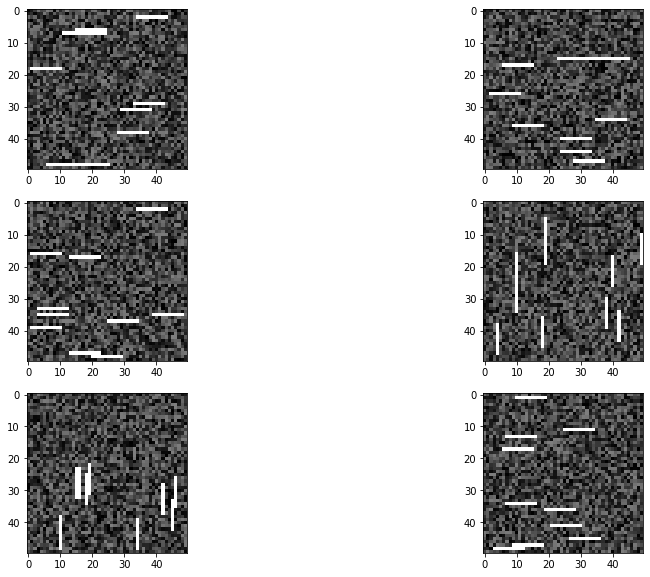

In [104]:
fig=plt.figure(figsize=(15, 10))
columns = 2
rows = 3
for i in range(1, columns*rows +1):
    img = train_data[i, :, :, 0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have at max trainable 32 parameters in the network.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.

In [177]:
kernel = 2
epochs = 150
bs = 5

#create model
model = Sequential()
#add model layers
model.add(Conv2D(2, kernel_size=4, strides=3, activation='relu', input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(8, 8), padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', lr=1, metrics=['acc'])
model.summary()


Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 16, 16, 2)         34        
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 2, 2, 2)           0         
_________________________________________________________________
flatten_89 (Flatten)         (None, 8)                 0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 9         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [178]:
history = model.fit(train_data, train_label, batch_size=bs, epochs=epochs, validation_data=(val_data, val_label));

Train on 1000 samples, validate on 1000 samples
Epoch 1/150
1000/1000 [==============================] - 3s 3ms/sample - loss: 10.9556 - acc: 0.5040 - val_loss: 6.9942 - val_acc: 0.5400
Epoch 2/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 5.9332 - acc: 0.5920 - val_loss: 5.1005 - val_acc: 0.6170
Epoch 3/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.2561 - acc: 0.6370 - val_loss: 3.7617 - val_acc: 0.6890
Epoch 4/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 2.9350 - acc: 0.7240 - val_loss: 2.6119 - val_acc: 0.7360
Epoch 5/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.8430 - acc: 0.7930 - val_loss: 1.6659 - val_acc: 0.8220
Epoch 6/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.1387 - acc: 0.8590 - val_loss: 1.1907 - val_acc: 0.8740
Epoch 7/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.8247 - acc: 0.8980 - val_loss: 0.9308 - val_acc:

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0627 - acc: 0.9870 - val_loss: 0.0852 - val_acc: 0.9810
Epoch 61/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0368 - acc: 0.9890 - val_loss: 0.0862 - val_acc: 0.9800
Epoch 62/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0481 - acc: 0.9860 - val_loss: 0.2472 - val_acc: 0.9620
Epoch 63/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0380 - acc: 0.9900 - val_loss: 0.0815 - val_acc: 0.9830
Epoch 64/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0454 - acc: 0.9860 - val_loss: 0.0908 - val_acc: 0.9800
Epoch 65/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0880 - acc: 0.9820 - val_loss: 0.0804 - val_acc: 0.9850
Epoch 66/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0585 - acc: 0.9860 - val_loss: 0.1827 - val_acc: 0.9730
Epoch 67/150
1000/1000 [=======================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0147 - acc: 0.9950 - val_loss: 0.0530 - val_acc: 0.9860
Epoch 120/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0223 - acc: 0.9940 - val_loss: 0.0607 - val_acc: 0.9830
Epoch 121/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0202 - acc: 0.9910 - val_loss: 0.1452 - val_acc: 0.9740
Epoch 122/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0243 - acc: 0.9890 - val_loss: 0.0653 - val_acc: 0.9860
Epoch 123/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0155 - acc: 0.9950 - val_loss: 0.0491 - val_acc: 0.9880
Epoch 124/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0104 - acc: 0.9970 - val_loss: 0.0466 - val_acc: 0.9870
Epoch 125/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0125 - acc: 0.9950 - val_loss: 0.0517 - val_acc: 0.9880
Epoch 126/150
1000/1000 [================

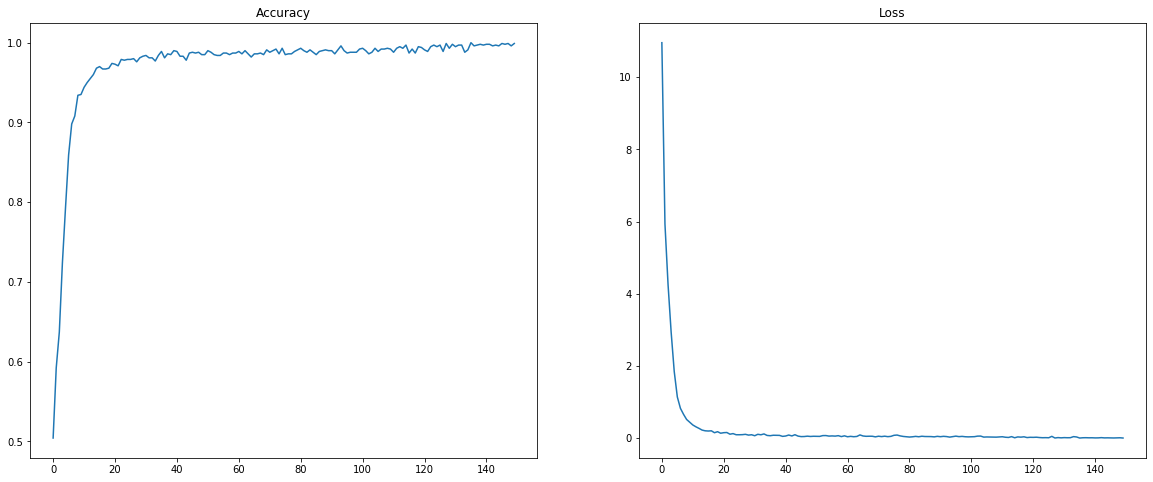

In [179]:
fig = plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Accuracy Train")
plt.plot(history.history["acc"])
plt.subplot(122)
plt.title("Loss Train")
plt.plot(history.history["loss"])

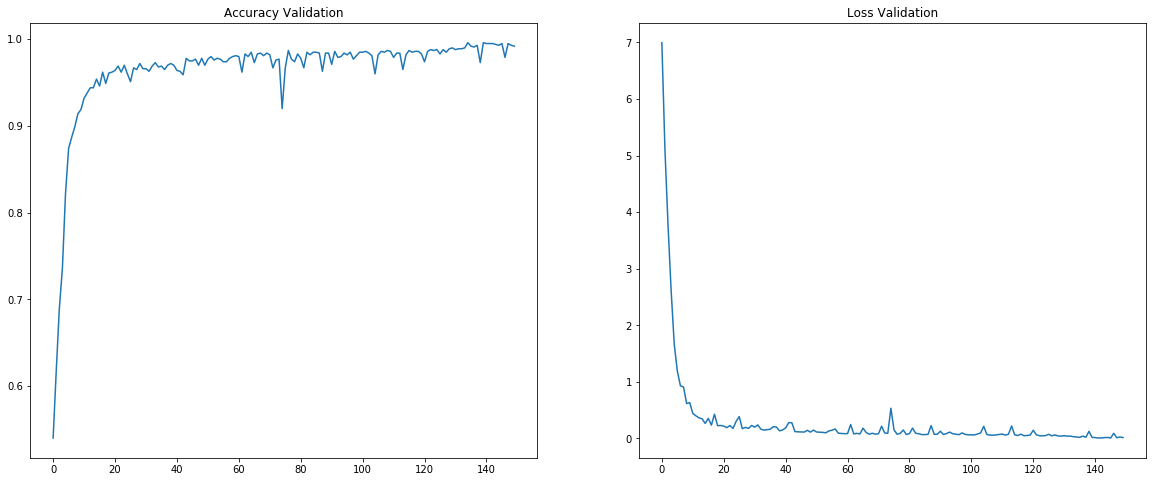

In [180]:
fig = plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Accuracy Validation")
plt.plot(history.history["val_acc"])
plt.subplot(122)
plt.title("Loss Validation")
plt.plot(history.history["val_loss"])

### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use model.get_weights(). Does the learned kernel makes sense?

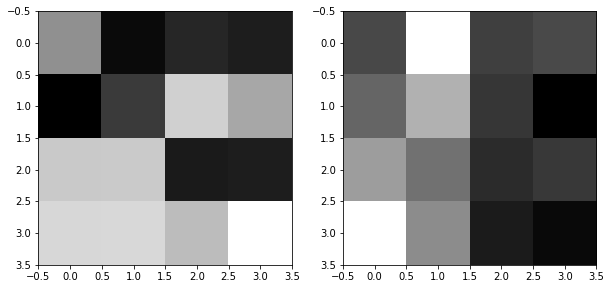

In [209]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
rows = 1
columns = 2
ix = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
for i in range(nrows):
    for j in range(ncols):
        filt = filters[:, :, 0, ix]
        axes[j].imshow(filt, cmap='gray');
        ix += 1